In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

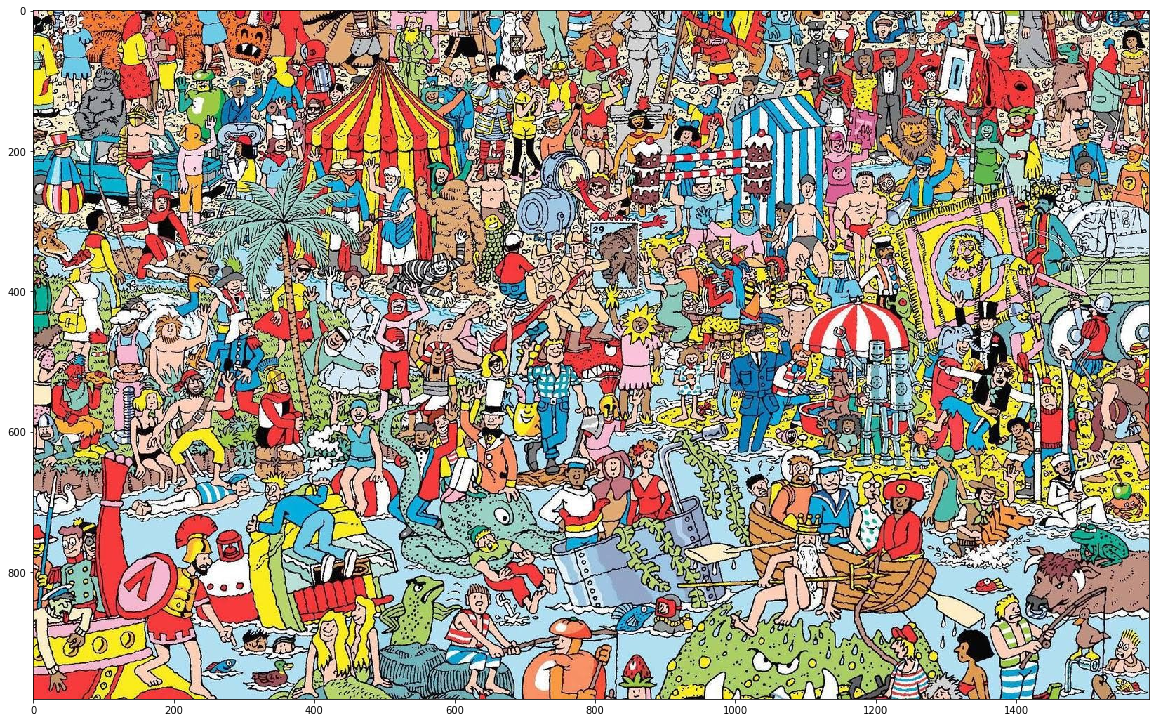

In [26]:
map = cv2.imread('where_is_waldo.jpg')
map = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(map)

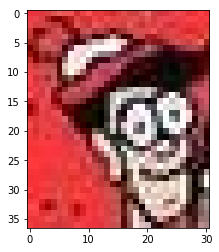

In [3]:
waldo = cv2.imread('template1.png')
waldo = cv2.cvtColor(waldo, cv2.COLOR_BGR2RGB)
plt.imshow(waldo)

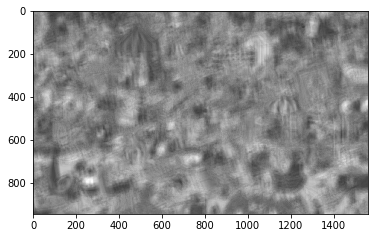

In [27]:
w, h = waldo.shape[0], waldo.shape[1]
res = cv2.matchTemplate(map,waldo,cv2.TM_SQDIFF)
plt.imshow(res, cmap='gray')

In [28]:
# figure out the location with the minimum SSD
_, _, min_loc, _ = cv2.minMaxLoc(res)

In [31]:
min_loc

(1258, 74)

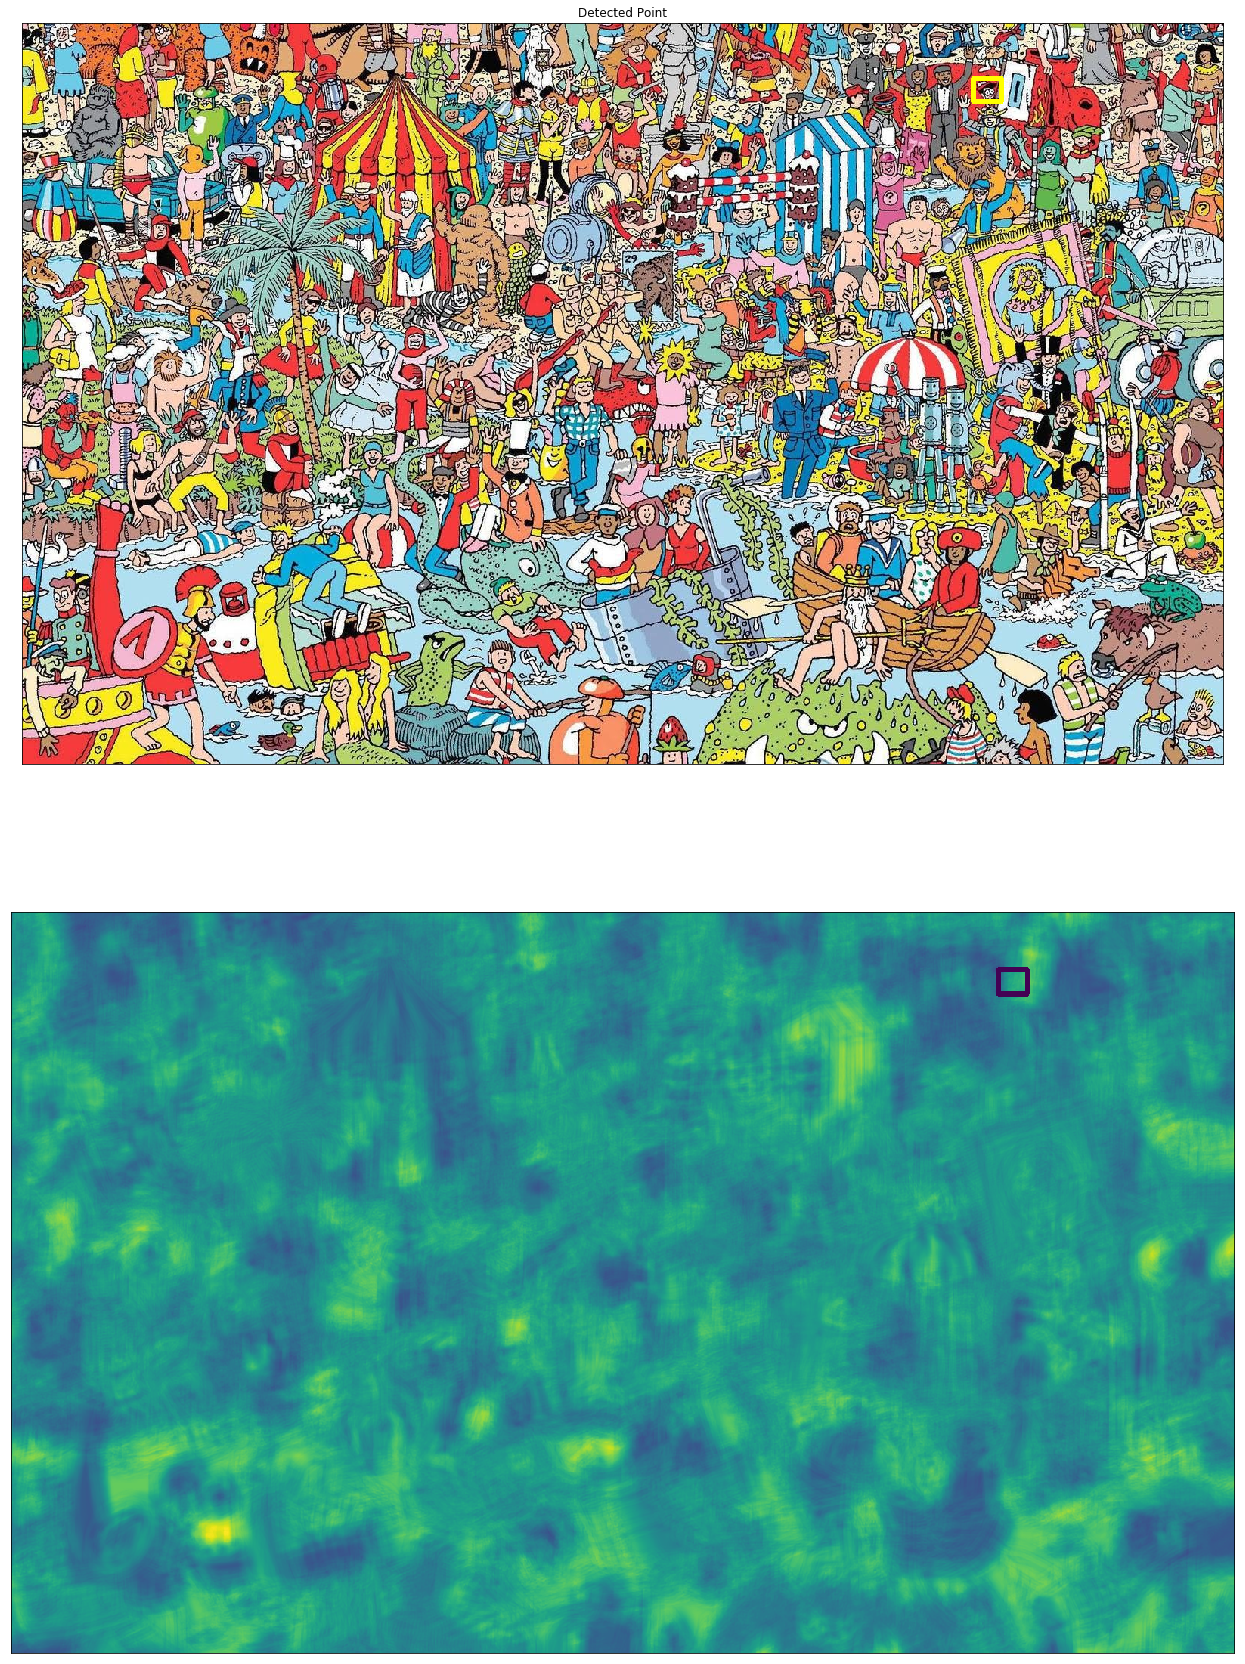

In [32]:
# draw box on the map around Waldo

top_left = min_loc
w, h, _ = waldo.shape
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(map, top_left, bottom_right, (255,255,0), 5)
plt.figure(figsize=(30, 30))
plt.subplot(211),plt.imshow(map)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

cv2.rectangle(res, top_left, bottom_right, (255,255,0), 5)
plt.subplot(212),plt.imshow(res)
plt.xticks([]), plt.yticks([])

plt.show()